# Customer Behaviour Analysis

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dat = pd.read_csv('C:\Users\ZhangYue\Documents\customer_behaviours\\cust_betype.csv')
dat.head()

,accountno,bettype,avg_odds,total_betamount,total_validationamount
0,100183,Halftime 1X2,6.025000,3200,1470.0
1,100213,Halftime 1X2,2.526486,6864,7524.3
2,100286,Halftime 1X2,2.075000,35,12.0
3,100341,Halftime 1X2,1.580000,200,0.0
4,100640,Halftime 1X2,4.648077,780,943.0


In [4]:
dat['bettype'].unique()

array(['Halftime 1X2', 'To Qualify in Pole - Driver (Live)',
       'Which Half More Goals', 'Halftime PTS', 'Race Winner - Driver',
       'Team to Score 5th Goal', 'Asian Handicap (+0.25)',
       'Asian Handicap (+1.75)', 'Asian Handicap (-0.25)',
       'Asian Handicap (-1.75)', 'Asian Handicap (-2.25)',
       'Asian Handicap (+0.75)', 'Asian Handicap (+1.25)',
       'Asian Handicap (-0.75)', 'Asian Handicap (-1.25)',
       'Asian Handicap (-2.75)', 'Asian Handicap (-3.25)',
       'Asian Handicap (+2.25)', 'Team to Score 8th Goal',
       'HTH - Driver ( S.Vettel v M.Verstappen )',
       'HTH - Driver ( L.Hamilton v K.Raikkonen )',
       'Total Goals Over/Under 0.5', 'Total Goals Over/Under 2.5',
       'Total Goals Over/Under 4.5', 'Total Goals Over/Under 1.5',
       'Total Goals Over/Under 3.5', 'Total Goals Over/Under 5.5',
       'Total Goals Over/Under 7.5', 'Total Goals Over/Under 6.5',
       'Total Goals Over/Under 8.5', 'Total Goals Over/Under 9.5',
       'Asian Ha

### Remove redundunt bet types

In [4]:
dat.loc[dat['bettype'].str.contains('1/2 Goal'), 'bettype'] = '1/2 Goal'  
dat.loc[dat['bettype'].str.contains('Total Goals Over/Under'), 'bettype'] = 'Total Goals Over/Under'
dat.loc[dat['bettype'].str.contains('Team to Score'), 'bettype'] = 'Team to Score'
dat.loc[dat['bettype'].str.contains('Asian Handicap'), 'bettype'] = 'Asian Handicap'
dat.loc[dat['bettype'].str.contains('Halftime Total Goals Over/Under'), 'bettype'] = 'Halftime Total Goals Over/Under'
dat.loc[dat['bettype'].str.contains('Pick The Score'), 'bettype'] = 'Pick the Score'

In [5]:
dat = dat[~dat['bettype'].str.contains('HTH')]
dat = dat[~dat['bettype'].str.contains('Driver')]
dat = dat[~dat['bettype'].str.contains('Lap')]
dat = dat[~dat['bettype'].str.contains('Dual')]
dat = dat[~dat['bettype'].str.contains('Championship')]
dat = dat[~dat['bettype'].str.contains('Top')]

In [6]:
dat['bettype'].unique()

array(['Halftime 1X2', 'Which Half More Goals', 'Halftime PTS',
       'Team to Score', 'Asian Handicap', 'Total Goals Over/Under',
       'Total Goals Odd/Even', 'Last Goal Scorer', '1st Goal Scorer',
       '1/2 Goal', 'Total Goals', 'Handicap 1X2', 'Pick the Score', '1X2',
       'Halftime-Fulltime'], dtype=object)

In [8]:
print 'Data has {} rows'.format(dat.shape[0])

Data has 296933 rows


### Mark top 5% customers

In [9]:
dat.head()

,accountno,bettype,avg_odds,total_betamount,total_validationamount
0,100183,Halftime 1X2,6.025000,3200,1470.0
1,100213,Halftime 1X2,2.526486,6864,7524.3
2,100286,Halftime 1X2,2.075000,35,12.0
3,100341,Halftime 1X2,1.580000,200,0.0
4,100640,Halftime 1X2,4.648077,780,943.0


In [7]:
customer_stake = dat.groupby('accountno', as_index=False).agg({'total_betamount': 'sum'}).\
                sort_values(by='total_betamount', ascending=False).reset_index(drop=True)

In [8]:
top_n = int(customer_stake.shape[0]*.05)

In [9]:
customer_stake['top_bettor'] = 0
customer_stake.loc[:(top_n+1), 'top_bettor'] = 1
customer_stake.head()

,accountno,total_betamount,top_bettor
0,9809016,15762648.33,1
1,10748210,13502395.71,1
2,100651,8958357.00,1
3,703771,7268709.62,1
4,196915,4858629.99,1


In [18]:
customer_stake['top_bettor'].value_counts()

0    21467
1     1131
Name: top_bettor, dtype: int64

In [10]:
top_stake = customer_stake.groupby('top_bettor', as_index=False).agg({'total_betamount': 'sum'}).loc[1, 'total_betamount']
else_stake = customer_stake.groupby('top_bettor', as_index=False).agg({'total_betamount': 'sum'}).loc[0, 'total_betamount']

#### Stake contribution comparison

(-1.1331313425133935,
 1.1006252449888791,
 -1.2205266192354016,
 1.1213232969926843)

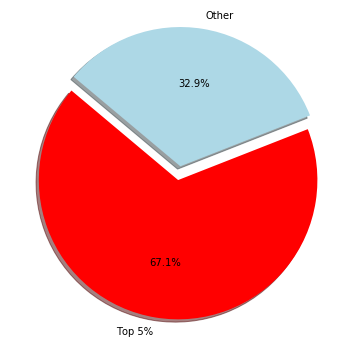

In [12]:
fig, ax = plt.subplots(figsize=[6, 6])
plt.pie([top_stake, else_stake], explode=[.1, 0], labels=['Top 5%', 'Other'], colors=['red', 'lightblue'],
           autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

#### Lorenz Curve(Measure stake contribution inequality)

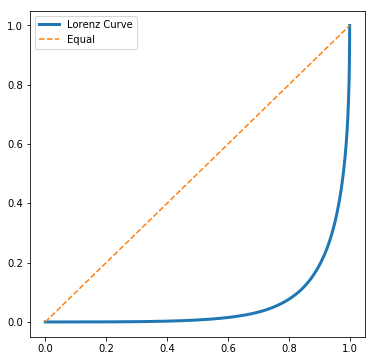

In [13]:
arr = np.array(customer_stake['total_betamount'].sort_values())  # sort in ascending order
arr = arr.cumsum()/arr.sum()
arr = np.insert(arr, 0, 0)
xtick = np.arange(len(arr))/float(len(arr))

fig, ax = plt.subplots(figsize=[6, 6])
ax.plot(xtick, arr, linewidth=3, label='Lorenz Curve')
# ax.fill(xtick, arr)
ax.plot([0, 1], [0, 1], linestyle='--', label='Equal')
ax.legend()

In [14]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

In [15]:
gini(arr)

0.7932460784341837

In [24]:
dat = dat.merge(customer_stake[['accountno', 'top_bettor']])
dat.head()

,accountno,bettype,avg_odds,total_betamount,total_validationamount,top_bettor
0,100183,Halftime 1X2,6.025000,3200.00,1470,0
1,100183,Halftime PTS,26.066667,750.00,0,0
2,100183,1X2,4.702785,61870.03,46286,0
3,100183,Pick the Score,33.188034,11640.00,4750,0
4,100183,Total Goals,22.970968,4750.00,2640,0


In [80]:
dat = dat[dat['avg_odds'] > 1]
dat.to_csv('C:\Users\ZhangYue\Documents\customer_behaviours\\cust_betype2.csv', index=False)

### Are they sensitive to odds?

In [3]:
dat = pd.read_csv('C:\Users\ZhangYue\Documents\customer_behaviours\\cust_betype2.csv')

#### Odds vs betamount

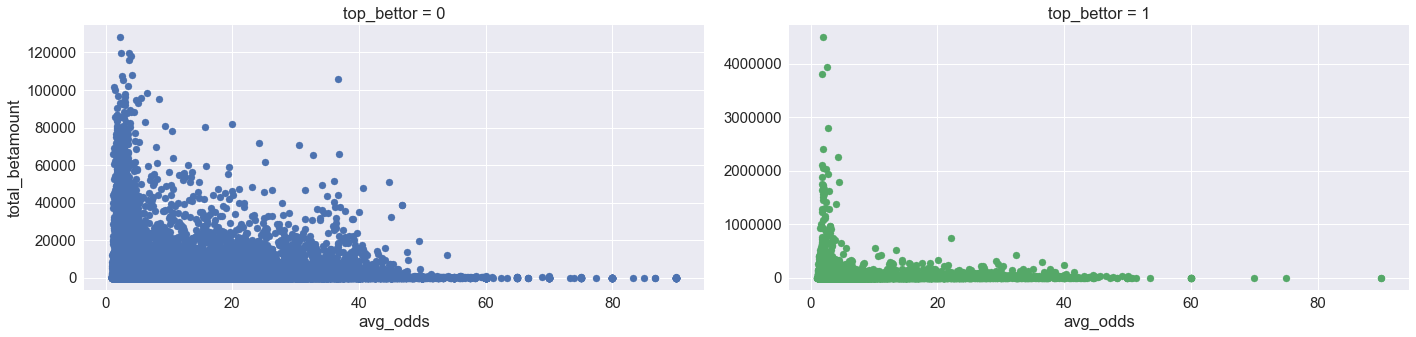

In [81]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(data=dat, col='top_bettor', hue='top_bettor', sharex=False, sharey=False, size=5, aspect=2)
g = g.map(plt.scatter, 'avg_odds', 'total_betamount')
# g.set_titles()

#### The plot implies a function stake = C/odds(where C is constant)

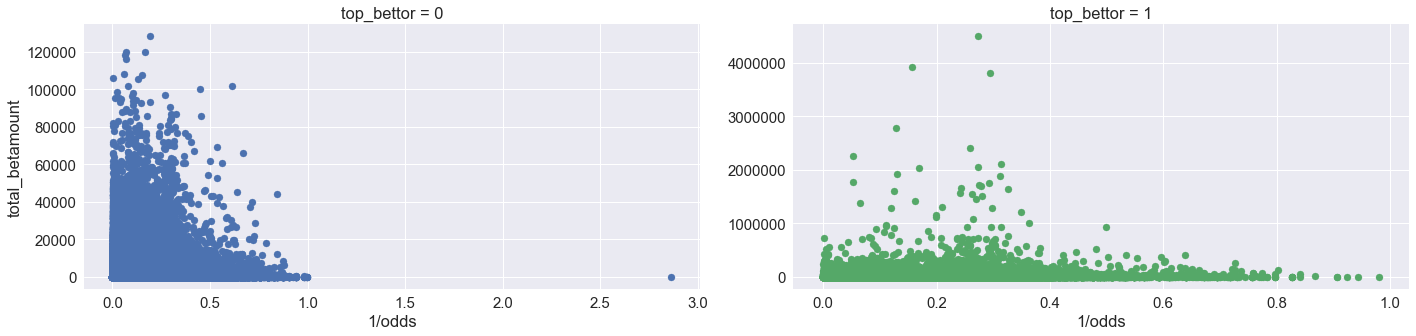

In [76]:
dat['1/odds'] = 1/(dat['avg_odds']**2)

sns.set(font_scale=1.5)
g = sns.FacetGrid(data=dat, col='top_bettor', hue='top_bettor', sharex=False, sharey=False, size=5, aspect=2)
g = g.map(plt.scatter, '1/odds', 'total_betamount')

#### Not so true...

#### Check correlation

In [82]:
top_cor = dat[dat['top_bettor'] == 1]
print 'Odds and stake correlation of top customers is ', top_cor['avg_odds'].corr(top_cor['total_betamount'])

Odds and stake correlation of top customers is  0.009908484017444746


In [83]:
else_cor = dat[dat['top_bettor'] == 0]
print 'Odds and stake correlation of other customers is ', else_cor['avg_odds'].corr(else_cor['total_betamount'])

Odds and stake correlation of other customers is  0.025334873885770354


#### Not make sense

#### Validate sensitivity by group odds, look at the slope 

In [4]:
format_dat = dat[['avg_odds', 'total_betamount']].applymap('{0:.1f}'.format)
format_dat['top_bettor'] = dat['top_bettor']
format_dat['avg_odds'] = pd.to_numeric(format_dat['avg_odds'])
format_dat['total_betamount'] = pd.to_numeric(format_dat['total_betamount'])
format_dat.head()

,avg_odds,total_betamount,top_bettor
0,6.0,3200,0
1,26.1,750,0
2,4.7,61870,0
3,33.2,11640,0
4,23.0,4750,0


In [7]:
format_dat_gp = format_dat.groupby(['avg_odds', 'top_bettor'], as_index=False).agg({'total_betamount': 'sum'})
format_dat_gp[format_dat_gp['top_bettor']==1].head(30)

,avg_odds,top_bettor,total_betamount
1,1.0,1,690.0
3,1.1,1,473663.9
5,1.2,1,2226879.1
7,1.3,1,4443623.6
9,1.4,1,5407510.2
11,1.5,1,7225727.7
13,1.6,1,11152148.0
15,1.7,1,24495405.5
17,1.8,1,58009462.6
19,1.9,1,61646393.4


#### The total total sum of bet amount of every odds

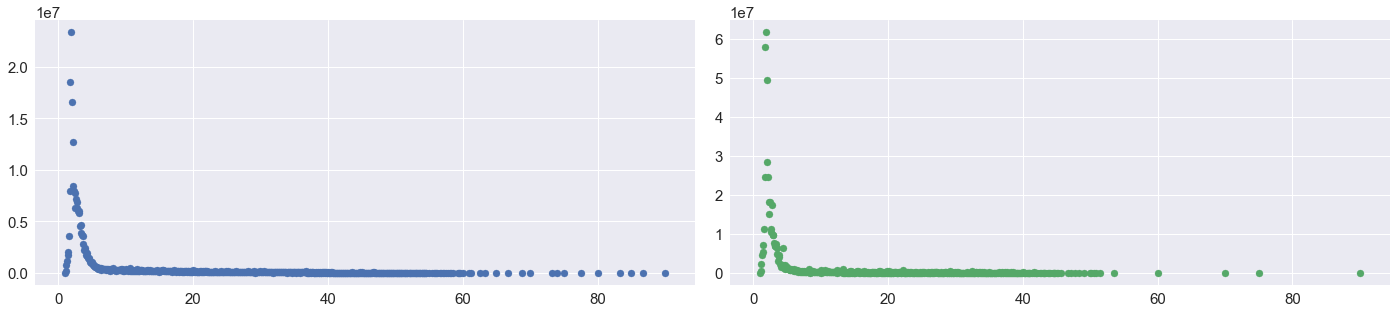

In [22]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(data=format_dat_gp, col='top_bettor', hue='top_bettor', sharex=False, sharey=False, size=5, aspect=2)
g = g.map(plt.scatter, 'avg_odds', 'total_betamount')
g.set_xlabels('')
g.set_titles('')
g.set_ylabels('')

In [103]:
normal_bettor = format_dat_gp[format_dat_gp['top_bettor'] == 0]
normal_bettor['shift'] = normal_bettor['total_betamount'].shift(1)
normal_bettor = normal_bettor.drop(0).reset_index(drop=True)

normal_bettor['increase(%)'] = (normal_bettor['total_betamount'] - normal_bettor['shift'])/normal_bettor['shift']

C:\Users\ZhangYue\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [110]:
top_bettor = format_dat_gp[format_dat_gp['top_bettor'] == 1]
top_bettor['shift'] = top_bettor['total_betamount'].shift(1)
topttor = top_bettor.drop(1).reset_index(drop=True)

top_bettor['increase(%)'] = (top_bettor['total_betamount'] - top_bettor['shift'])/top_bettor['shift']

C:\Users\ZhangYue\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\ZhangYue\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [114]:
top_bettor = top_bettor.drop(1).reset_index(drop=True)

#### Check bet amount increase percentage by odds

In [125]:
pd.concat([normal_bettor[['avg_odds', 'increase(%)']][:50], top_bettor[['increase(%)']][:50]], axis=1)

,avg_odds,increase(%),increase(%)
0,1.1,126.095446,685.469420
1,1.2,2.606394,3.701391
2,1.3,0.589633,0.995449
3,1.4,0.421769,0.214660
4,1.5,0.176062,0.340784
5,1.6,0.816140,0.540863
6,1.7,1.222577,1.196695
7,1.8,1.323838,1.368177
8,1.9,0.257104,0.062533
9,2.0,-0.290529,-0.198343


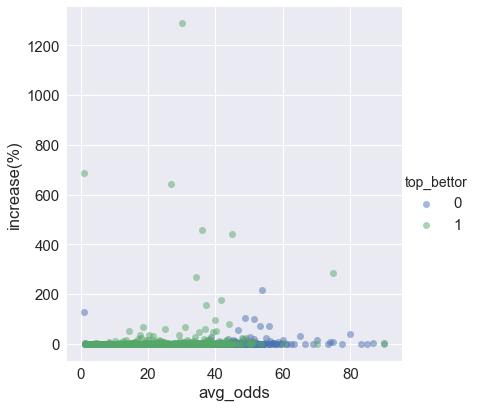

In [141]:
all_increase = pd.concat([normal_bettor[['avg_odds', 'top_bettor', 'increase(%)']], 
                          top_bettor[['avg_odds', 'top_bettor', 'increase(%)']]])   

sns.lmplot(x='avg_odds', y='increase(%)', data=all_increase, hue='top_bettor', fit_reg=False, size=6, scatter_kws={'alpha':0.5})

#### Some increase above 200% is significantly different for top_bettors

In [139]:
top_bettor[top_bettor['increase(%)'] > 200][['avg_odds', 'increase(%)']].reset_index(drop=True)

,avg_odds,increase(%)
0,1.1,685.469420
1,26.9,641.774384
2,30.0,1289.953846
3,34.3,270.701500
4,36.0,458.412500
5,44.8,440.653159
6,75.0,284.714286


### What types of bet types they buy (is it different from rest of the customers)

#### In terms of transactions

In [28]:
dat.head()

,accountno,bettype,avg_odds,total_betamount,total_validationamount,top_bettor
0,100183,Halftime 1X2,6.025000,3200.00,1470,0
1,100183,Halftime PTS,26.066667,750.00,0,0
2,100183,1X2,4.702785,61870.03,46286,0
3,100183,Pick the Score,33.188034,11640.00,4750,0
4,100183,Total Goals,22.970968,4750.00,2640,0


In [49]:
from sklearn.preprocessing import minmax_scale

In [67]:
dat_count = dat[['bettype', 'top_bettor', 'accountno']]
dat_count = dat_count.groupby(['bettype', 'top_bettor'], as_index=False).agg({'accountno': 'count'})
dat_count['sum_count'] = dat_count.groupby('top_bettor')['accountno'].transform(lambda x: np.sum(x))
dat_count['norm_count'] = dat_count['accountno']*100/dat_count['sum_count']

Text(0,0.5,'')

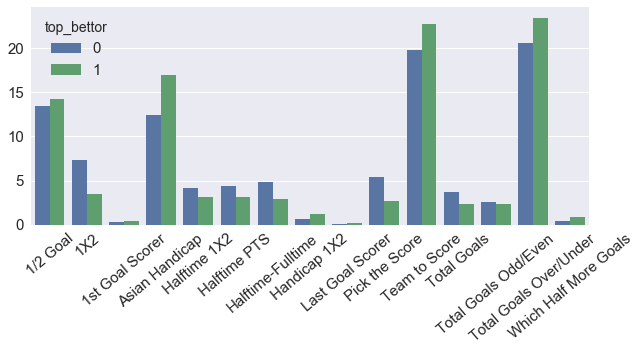

In [68]:
fig, ax = plt.subplots(figsize=[10, 4])

g = sns.barplot(data=dat_count, x='bettype', y='norm_count', hue='top_bettor', ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=40)
g.set_xlabel('')
g.set_ylabel('')

#### In terms of stake

In [61]:
betype_stake = dat.groupby(['top_bettor', 'bettype'], as_index=False).agg({'total_betamount': 'sum'})

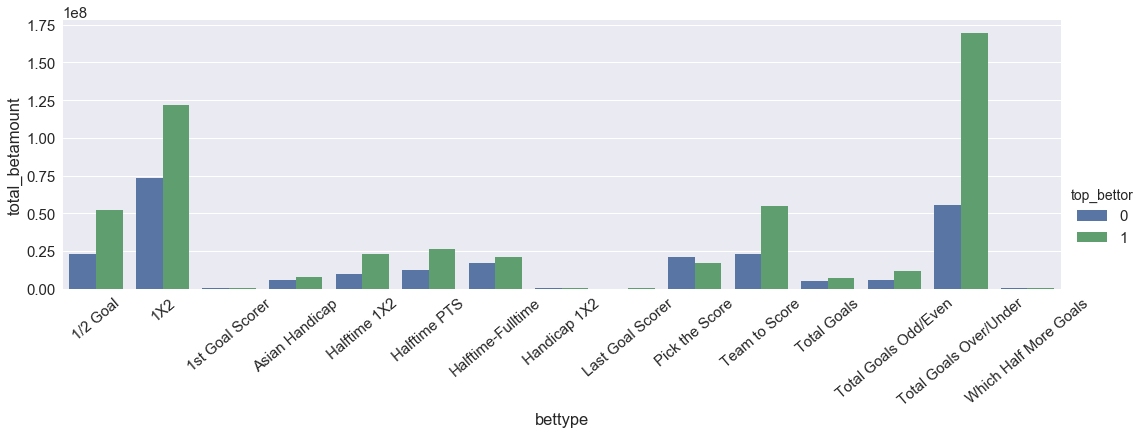

In [178]:
g = sns.factorplot(x='bettype', y='total_betamount', data=betype_stake, kind='bar', hue='top_bettor', size=5, aspect=3)
g.set_xticklabels(rotation=40)

#### Stake percentage

In [62]:
stake_pct = betype_stake.groupby('top_bettor', as_index=False).agg({'total_betamount': 'sum'}).merge(betype_stake, on='top_bettor')
stake_pct['Percentage(%)'] = stake_pct['total_betamount_y']*100/stake_pct['total_betamount_x'].astype(float)
stake_pct.head()

,top_bettor,total_betamount_x,bettype,total_betamount_y,Percentage(%)
0,0,2.518657e+08,1/2 Goal,23222787.35,9.220305
1,0,2.518657e+08,1X2,73365766.90,29.128921
2,0,2.518657e+08,1st Goal Scorer,42365.60,0.016821
3,0,2.518657e+08,Asian Handicap,5504227.00,2.185382
4,0,2.518657e+08,Halftime 1X2,9868179.17,3.918032


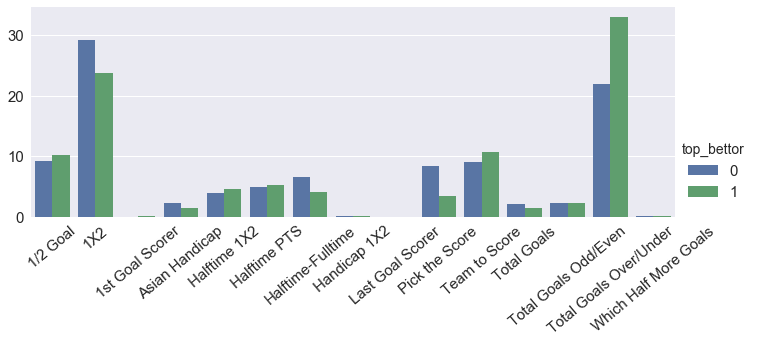

In [70]:
g = sns.factorplot(x='bettype', y='Percentage(%)', data=stake_pct, kind='bar', hue='top_bettor', size=4, aspect=2.5)
g.set_xticklabels(rotation=40)

g.set_xlabels('')
g.set_ylabels('')

#### Seems they are more conservative
They bet more(percentage) on '1/2 GOAL', 'Halftime 1x2', 'Team to Score', 'Total Goals Over/Under'.

In [5]:
dat = pd.read_csv('cust_betype2.csv')
dat.head()

,accountno,bettype,avg_odds,total_betamount,total_validationamount,top_bettor
0,100183,Halftime 1X2,6.025000,3200.00,1470,0
1,100183,Halftime PTS,26.066667,750.00,0,0
2,100183,1X2,4.702785,61870.03,46286,0
3,100183,Pick the Score,33.188034,11640.00,4750,0
4,100183,Total Goals,22.970968,4750.00,2640,0


### How likely they are to bet on high odds compare to the rest?

#### Lorenz Curve of odds

In [71]:
top = dat[dat['top_bettor'] == 1]
rest = dat[dat['top_bettor'] == 0]

In [72]:
def LC(dat):
    dat = dat.sort_values(by='avg_odds')
    x = dat['avg_odds'].values
    y = dat['total_betamount'].values.cumsum()/dat['total_betamount'].values.sum()
    return x, y

In [73]:
top_x, top_y = LC(top)
rest_x, rest_y = LC(rest)

Text(0,0.5,'Stake(percentage%)')

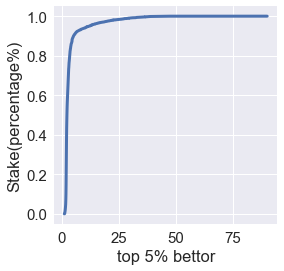

In [82]:
fig, ax = plt.subplots(figsize=[4, 4])

ax.plot(top_x, top_y, linewidth=3)
ax.set_xlabel('top 5% bettor')
ax.set_ylabel('Stake(percentage%)')

Text(0,0.5,'Stake(percentage%)')

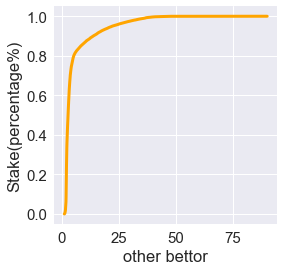

In [80]:
fig, ax = plt.subplots(figsize=[4, 4])

ax.plot(rest_x, rest_y, linewidth=3, color='orange')
ax.set_xlabel('other bettor')
ax.set_ylabel('Stake(percentage%)')

Text(0,0.5,'Stake(percentage%)')

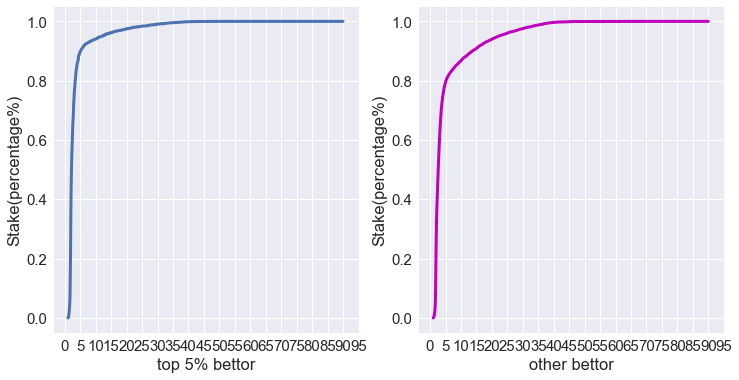

In [74]:
fig = plt.figure(figsize=[12, 6])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(top_x, top_y, linewidth=3)
ax2.plot(rest_x, rest_y, color='m', linewidth=3)

ax1.set_xticks(np.arange(0, 100, step=5))
ax2.set_xticks(np.arange(0, 100, step=5))

ax1.set_xlabel('top 5% bettor')
ax1.set_ylabel('Stake(percentage%)')
ax2.set_xlabel('other bettor')
ax2.set_ylabel('Stake(percentage%)')

##### Y axis is cumculative percentage sum of stake amount, X axis is odds

#### Put them in one graph

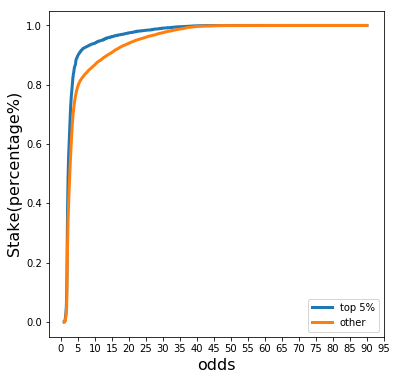

In [29]:
fig, ax = plt.subplots(figsize=[6, 6])

ax.plot(top_x, top_y, linewidth=3, label='top 5%')
ax.plot(rest_x, rest_y, linewidth=3, label='other')
ax.set_xticks(np.arange(0, 100, 5))

ax.set_xlabel('odds', fontsize=16)
ax.set_ylabel('Stake(percentage%)', fontsize=16)

plt.legend()

#### Slope indicates sensitivity, top 5% is more sensitive at the odds around 5. (More ...)

### How is their payout? Are they wiser?

In [83]:
top['payout ratio(%)'] = (top['total_validationamount']-top['total_betamount'])*100/top['total_betamount']
rest['payout ratio(%)'] = (rest['total_validationamount']-rest['total_betamount'])*100/rest['total_betamount']

C:\Users\ZhangYue\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\ZhangYue\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### Boxplot to see if there exists a difference. Yes, boxplot again

In [6]:
dat['payout ratio(%)'] = (dat['total_validationamount']-dat['total_betamount'])*100/dat['total_betamount']

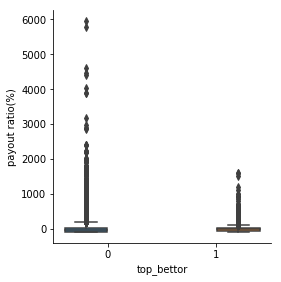

In [37]:
sns.factorplot(data=dat, x='top_bettor', y='payout ratio(%)', hue='top_bettor', kind='box')

#### ignore those high ratio(they are barely luck), since people only bet very little amount on that

In [7]:
dat['top'] = dat['top_bettor'].apply(lambda x: 'top 5%' if x==1 else 'other')

In [18]:
dat.head(3)

,accountno,bettype,avg_odds,total_betamount,total_validationamount,top_bettor,payout ratio(%),top,payout ratio
0,100183,Halftime 1X2,6.025000,3200.00,1470,0,-54.062500,other,-54.062500
1,100183,Halftime PTS,26.066667,750.00,0,0,-100.000000,other,-100.000000
2,100183,1X2,4.702785,61870.03,46286,0,-25.188334,other,-25.188334


<Figure size 500x400 with 0 Axes>

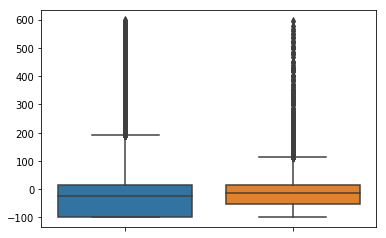

<Figure size 500x400 with 0 Axes>

In [27]:
g = sns.boxplot(data=dat[dat['payout ratio(%)'] < 600], x='top_bettor', y='payout ratio(%)')
g.set_xticklabels('')
g.set_xlabel('')
g.set_ylabel('')
plt.figure(figsize=[5, 4])

#### Seems that top customers are wiser, carryout test to check, before this we need to check if they follow Guassian distribution

(-100, 1000)

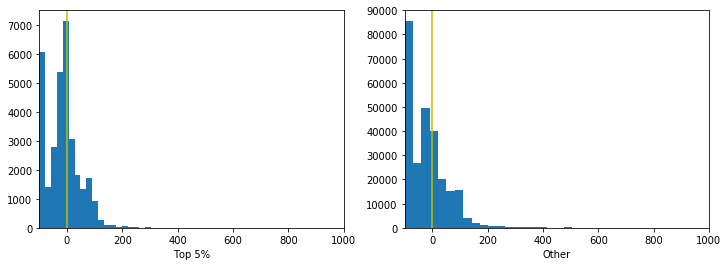

In [82]:
fig = plt.figure(figsize=[12, 4])

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(top['payout ratio(%)'], bins=80)
ax2.hist(rest['payout ratio(%)'], bins=200)

ax1.axvline(x=0, c='y')
ax2.axvline(x=0, c='y')

ax1.set_xlabel('Top 5%', fontsize=10)
ax2.set_xlabel('Other', fontsize=10)

ax1.set_xlim([-100, 1000])
ax2.set_xlim([-100, 1000])

#### Carry out kruskal-wallis test to compare the distribution

In [80]:
from scipy.stats import mstats

In [78]:
np.array(top['payout ratio(%)']).shape

(32495L,)

In [81]:
mstats.kruskalwallis(np.array(top['payout ratio(%)']), np.array(rest['payout ratio(%)']))

KruskalResult(statistic=987.4883169610322, pvalue=9.416117931682814e-217)

#### significantly different

### By accountno, how much they win and lose

In [87]:
top.head()

,accountno,bettype,avg_odds,total_betamount,total_validationamount,top_bettor,payout ratio(%)
7,100213,Halftime 1X2,2.526486,6864.00,7524.30,1,9.619755
8,100213,Halftime PTS,3.904778,6428.90,5519.55,1,-14.144721
9,100213,1X2,2.579736,327100.36,291132.00,1,-10.996124
10,100213,Asian Handicap,1.850000,200.00,185.00,1,-7.500000
11,100213,Asian Handicap,1.822500,500.00,352.00,1,-29.600000


In [89]:
top_account = top.groupby('accountno', as_index=False).agg({'total_betamount': 'sum', 'total_validationamount': 'sum'})
rest_account = rest.groupby('accountno', as_index=False).agg({'total_betamount': 'sum', 'total_validationamount': 'sum'})

top_account['wining'] = top_account['total_validationamount'] - top_account['total_betamount']
top_account['wining_ratio'] = top_account['wining']/top_account['total_betamount']

rest_account['wining'] = rest_account['total_validationamount'] - rest_account['total_betamount']
rest_account['wining_ratio'] = rest_account['wining']/rest_account['total_betamount']

In [91]:
rest_account['is_win'] = rest_account['wining'].apply(lambda x: 1 if x>0 else 0)
top_account['is_win'] = top_account['wining'].apply(lambda x: 1 if x>0 else 0)

#### The demographic of wining and losing

In [95]:
rest_account['is_win'].value_counts()

0    19162
1     2297
Name: is_win, dtype: int64

In [96]:
top_account['is_win'].value_counts()

0    1097
1      34
Name: is_win, dtype: int64

Text(0.5,1,'Other')

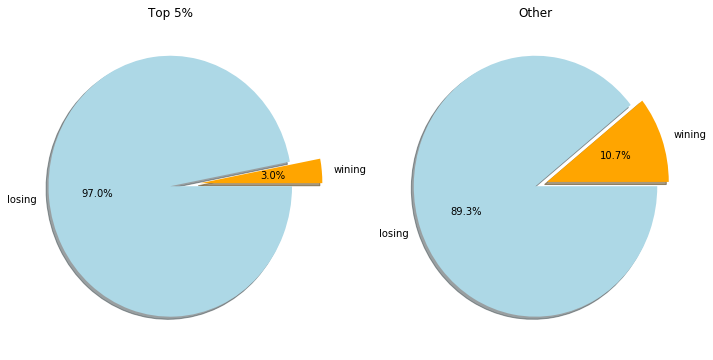

In [103]:
fig = plt.figure(figsize=[12, 6])

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.pie([34, 1097], explode=[.25, 0], labels=['wining', 'losing'], colors=['orange', 'lightblue'], shadow=True, autopct='%1.1f%%')
ax2.pie([2297, 19162], explode=[.1, 0], labels=['wining', 'losing'], colors=['orange', 'lightblue'], shadow=True, autopct='%1.1f%%')

ax1.set_title('Top 5%')
ax2.set_title('Other')

Text(0.5,1,'Other')

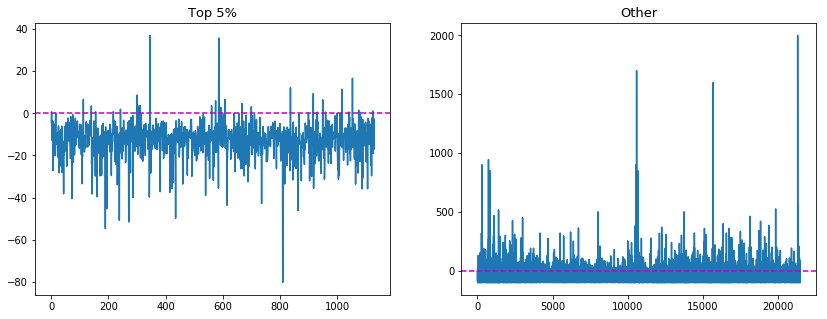

In [120]:
fig = plt.figure(figsize=[14, 5])

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(top_account['wining_ratio']*100)
ax1.axhline(y=0, color='m', linestyle='--')

ax2.plot(rest_account['wining_ratio']*100)
ax2.axhline(y=0, color='m', linestyle='--')

ax1.set_title('Top 5%', fontsize=13)
ax2.set_title('Other', fontsize=13)

In [121]:
dat.head()

,accountno,bettype,avg_odds,total_betamount,total_validationamount,top_bettor,payout ratio(%)
0,100183,Halftime 1X2,6.025000,3200.00,1470,0,-54.062500
1,100183,Halftime PTS,26.066667,750.00,0,0,-100.000000
2,100183,1X2,4.702785,61870.03,46286,0,-25.188334
3,100183,Pick the Score,33.188034,11640.00,4750,0,-59.192440
4,100183,Total Goals,22.970968,4750.00,2640,0,-44.421053


#### Done Here slash-slash-slash-slash-slash-slash-slash-slash-slash-slash-slash-slash

### Extra

#### Bettors preference on bet types, how much they are willing to bet on average of a bet type

In [90]:
avg_bet = dat.groupby(['bettype', 'top_bettor'], as_index=False).agg({'total_betamount': 'mean'}).reset_index(drop=True)
avg_bet = avg_bet.rename(columns={'total_betamount': 'avg_betamount'})
avg_bet

,bettype,top_bettor,avg_betamount
0,1/2 Goal,0,651.629927
1,1/2 Goal,1,11273.158914
2,1X2,0,3782.910534
3,1X2,1,108319.655939
4,1st Goal Scorer,0,64.483409
5,1st Goal Scorer,1,736.263125
6,Asian Handicap,0,167.678883
7,Asian Handicap,1,1374.993924
8,Halftime 1X2,0,910.936875
9,Halftime 1X2,1,22410.821725


In [91]:
avg_bet.groupby('top_bettor', as_index=False).agg({'avg_betamount': 'max'})

,top_bettor,avg_betamount
0,0,3782.910534
1,1,108319.655939


#### Normalizeing bet amount

In [92]:
avg_bet['normalized_betamount'] = \
    avg_bet.apply(lambda row: row['avg_betamount']/108319.65 if row['top_bettor']==1 else row['avg_betamount']/3782.91, axis=1)

[Text(0,0,'1/2 Goal'),
 Text(0,0,'1X2'),
 Text(0,0,'1st Goal Scorer'),
 Text(0,0,'Asian Handicap'),
 Text(0,0,'Halftime 1X2'),
 Text(0,0,'Halftime PTS'),
 Text(0,0,'Halftime-Fulltime'),
 Text(0,0,'Handicap 1X2'),
 Text(0,0,'Last Goal Scorer'),
 Text(0,0,'Pick the Score'),
 Text(0,0,'Team to Score'),
 Text(0,0,'Total Goals'),
 Text(0,0,'Total Goals Odd/Even'),
 Text(0,0,'Total Goals Over/Under'),
 Text(0,0,'Which Half More Goals')]

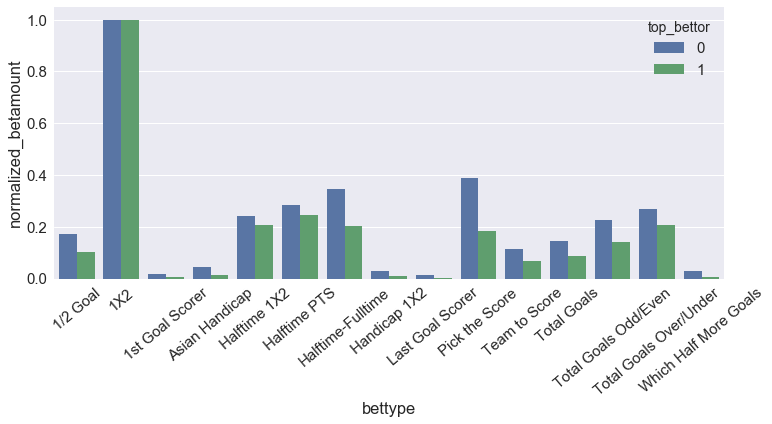

In [93]:
fig, ax = plt.subplots(figsize=[12, 5])

g = sns.barplot(data=avg_bet, x='bettype', y='normalized_betamount', hue='top_bettor', ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=40)

### Check the odds of each bet type

In [3]:
dat = pd.read_csv('cust_betype2.csv')
dat.head()

,accountno,bettype,avg_odds,total_betamount,total_validationamount,top_bettor
0,100183,Halftime 1X2,6.025000,3200.00,1470,0
1,100183,Halftime PTS,26.066667,750.00,0,0
2,100183,1X2,4.702785,61870.03,46286,0
3,100183,Pick the Score,33.188034,11640.00,4750,0
4,100183,Total Goals,22.970968,4750.00,2640,0


In [4]:
dat.bettype.unique()

array(['Halftime 1X2', 'Halftime PTS', '1X2', 'Pick the Score',
       'Total Goals', 'Halftime-Fulltime', 'Team to Score',
       'Asian Handicap', '1/2 Goal', 'Total Goals Over/Under',
       'Total Goals Odd/Even', 'Handicap 1X2', 'Which Half More Goals',
       '1st Goal Scorer', 'Last Goal Scorer'], dtype=object)

[Text(0,0,'Halftime 1X2'),
 Text(0,0,'Halftime PTS'),
 Text(0,0,'1X2'),
 Text(0,0,'Pick the Score'),
 Text(0,0,'Total Goals'),
 Text(0,0,'Halftime-Fulltime'),
 Text(0,0,'Team to Score'),
 Text(0,0,'Asian Handicap'),
 Text(0,0,'1/2 Goal'),
 Text(0,0,'Total Goals Over/Under'),
 Text(0,0,'Total Goals Odd/Even'),
 Text(0,0,'Handicap 1X2'),
 Text(0,0,'Which Half More Goals'),
 Text(0,0,'1st Goal Scorer'),
 Text(0,0,'Last Goal Scorer')]

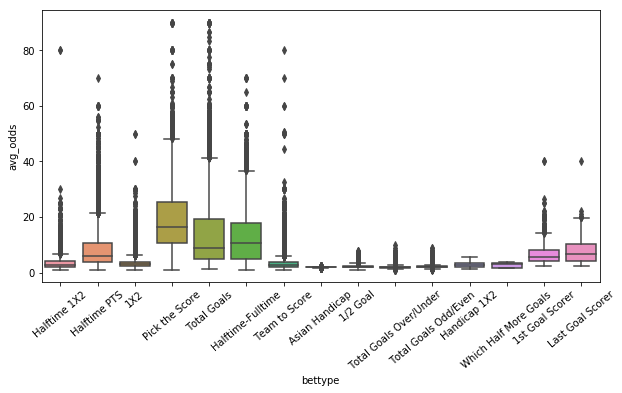

In [10]:
fig, ax = plt.subplots(figsize=[10, 5])

g = sns.boxplot(data=dat, x='bettype', y='avg_odds', ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=40)

### Top bettors and other bettors, their payout ratio on different bet types

In [9]:
dat['payout ratio'] = 100*(dat.iloc[:, 4]-dat.iloc[:, 3])/dat.iloc[:, 3]
dat.head()

,accountno,bettype,avg_odds,total_betamount,total_validationamount,top_bettor,payout ratio(%),top,payout ratio
0,100183,Halftime 1X2,6.025000,3200.00,1470,0,-54.062500,other,-54.062500
1,100183,Halftime PTS,26.066667,750.00,0,0,-100.000000,other,-100.000000
2,100183,1X2,4.702785,61870.03,46286,0,-25.188334,other,-25.188334
3,100183,Pick the Score,33.188034,11640.00,4750,0,-59.192440,other,-59.192440
4,100183,Total Goals,22.970968,4750.00,2640,0,-44.421053,other,-44.421053


Text(0,0.5,'')

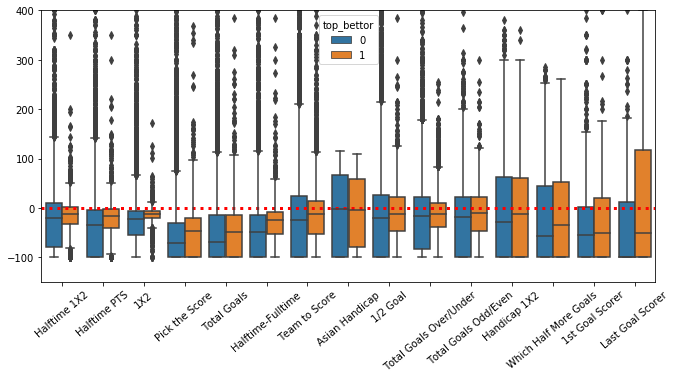

In [12]:
fig, ax = plt.subplots(figsize=[11, 5])
ax.set_ylim([-150, 400])
ax.axhline(y=0, linewidth=3, color='r', linestyle=':')

g = sns.boxplot(data=dat, x='bettype', y='payout ratio', hue='top_bettor', ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=40)
g.set_xlabel('')
g.set_ylabel('')

#### At those 1x2, top bettors actually have a better estimation than other bettors, they lost less. Those box below the red line means people barely win money at this bet type